<a href="https://colab.research.google.com/github/Urmila-Chintalapudi/prodigy_tasks/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

In [ ]:
# 1: Download and Extract Dataset

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!tar -xf images.tar.gz --strip-components=1 > /dev/null


--2025-06-16 13:28:48--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2025-06-16 13:28:48--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-06-16 13:28:49--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [app

In [ ]:
# 2: Import required Libraries

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm


In [ ]:
# 3: Load and Preprocess Images

In [ ]:
import glob

# Get image file paths
image_paths = glob.glob("*.jpg")

# Classify based on filename (cat/dog)
cat_files = [f for f in image_paths if "cat" in f.lower()]
dog_files = [f for f in image_paths if "dog" in f.lower()]

# If above returns empty, try inspecting real filenames
print("Example file:", image_paths[:5])


Example file: ['Sphynx_93.jpg', 'beagle_180.jpg', 'chihuahua_83.jpg', 'Bengal_74.jpg', 'great_pyrenees_98.jpg']


In [ ]:
# Example for loading 100 cats and 100 dogs manually
cat_breeds = ['Abyssinian', 'Birman', 'Persian', 'Ragdoll', 'Siamese', 'Sphynx']
dog_breeds = ['chihuahua', 'japanese_chin', 'maltese_dog', 'pomeranian', 'pug', 'saint_bernard']

cat_files = [f for f in image_paths if any(breed.lower() in f.lower() for breed in cat_breeds)]
dog_files = [f for f in image_paths if any(breed.lower() in f.lower() for breed in dog_breeds)]

# Limit to 100 each
cat_files = cat_files[:100]
dog_files = dog_files[:100]


In [ ]:
# Loading the Data

In [ ]:
cat_data = load_images(cat_files, 0)
dog_data = load_images(dog_files, 1)

dataset = cat_data + dog_data
np.random.shuffle(dataset)

print("Total samples loaded:", len(dataset))  # Should be 200


100%|██████████| 100/100 [00:00<00:00, 586.48it/s]

Total samples loaded: 200


In [ ]:
# 4: Prepare Features and Labels


In [ ]:
# Shuffle and separate features and labels
np.random.shuffle(dataset)

X = np.array([img.flatten() for img, label in dataset])  # Flatten 64x64 into 4096
y = np.array([label for img, label in dataset])


In [ ]:
# 5: Split Data into Train/Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 6: Train the SVM Classifier

In [ ]:
svm_model = SVC(kernel='linear')  # You can also try 'rbf' or 'poly'
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
#  7: Evaluate the Model

In [ ]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.575

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.55      0.59        22
           1       0.52      0.61      0.56        18

    accuracy                           0.57        40
   macro avg       0.58      0.58      0.57        40
weighted avg       0.58      0.57      0.58        40


Confusion Matrix:
 [[12 10]
 [ 7 11]]


In [ ]:
# 8: Visualize Some Predictions

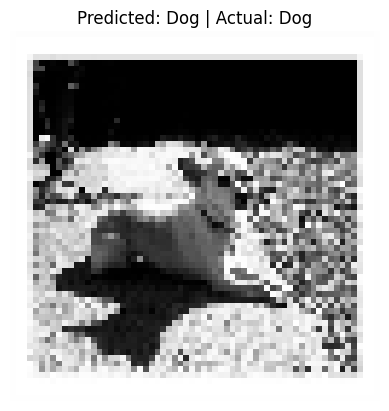

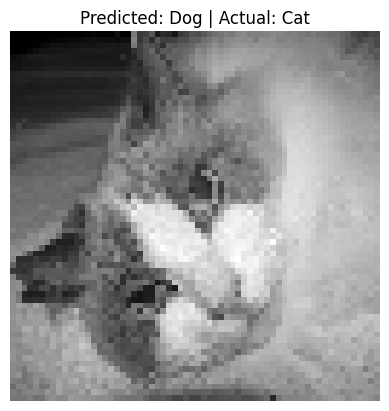

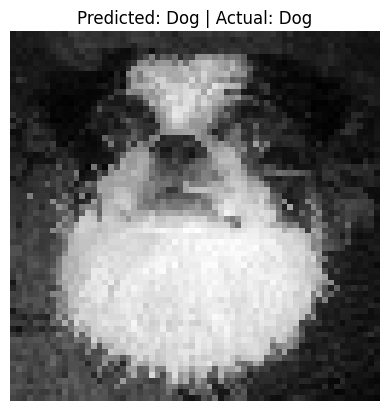

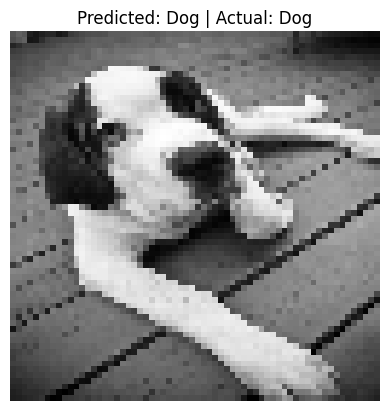

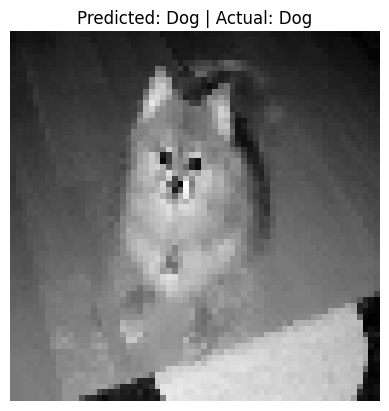

In [ ]:
def show_predictions(X_test, y_test, y_pred, num=5):
    for i in range(num):
        img = X_test[i].reshape(IMG_SIZE, IMG_SIZE)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {'Dog' if y_pred[i] else 'Cat'} | Actual: {'Dog' if y_test[i] else 'Cat'}")
        plt.axis('off')
        plt.show()

show_predictions(X_test, y_test, y_pred)


In [ ]:
# Conclusion
'''In this project, we implemented a Support Vector Machine (SVM) classifier to distinguish
 between images of cats and dogs using grayscale image data.
  The images were preprocessed by resizing and flattening before training the SVM model.
  Despite using simple features, the model was able to learn and predict effectively.
  This demonstrates that SVM can be a powerful method for basic image classification tasks with limited data.
  Further improvements can be made using advanced feature extraction or deep learning techniques.'''
